In [1]:
import pandas as pd
import requests

#making a get request to api and collecting json response
data_dwnld = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")
data = data_dwnld.json()

# getting the episodes data from the response
Data = data['_embedded']['episodes']

# we noticed original column was missing so to solve that
original_column = [d['image']['original'] if d['image'] else None for d in Data]
df = pd.DataFrame(Data)

#adding a column named 'Original image link' data
df['Original image link'] = original_column

#  changing 'airdate' datatype to date format
df['airdate']= pd.to_datetime(df['airdate'])

# firstly changing 'airtime' to time format where %H = hours %M = minutes
df['airtime']=pd.to_datetime(df['airtime'],format='%H:%M')

# changing 'airtime' to asked format(12hours) where %I=12 hour time %M= minutes %p = Am/Pm
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')

# changing 'runtime' to specified data type
df['runtime']= df['runtime'].astype('float')

# firstly removing the 'average' key
df['rating'] = df['rating'].apply(lambda x: x['average'])

# changing 'rating' column name as specified
df = df.rename(columns = {'rating':'average rating'})

# removing the 'medium' key to get the link
df['image'] = df['image'].apply(lambda x: x['medium'])

#renaming 'image' column name as specified
df = df.rename(columns = {'image':'medium image link'})

#removing the html tags from the summary
df['summary']= df['summary'].str.strip('<p>').str.strip('</p>')

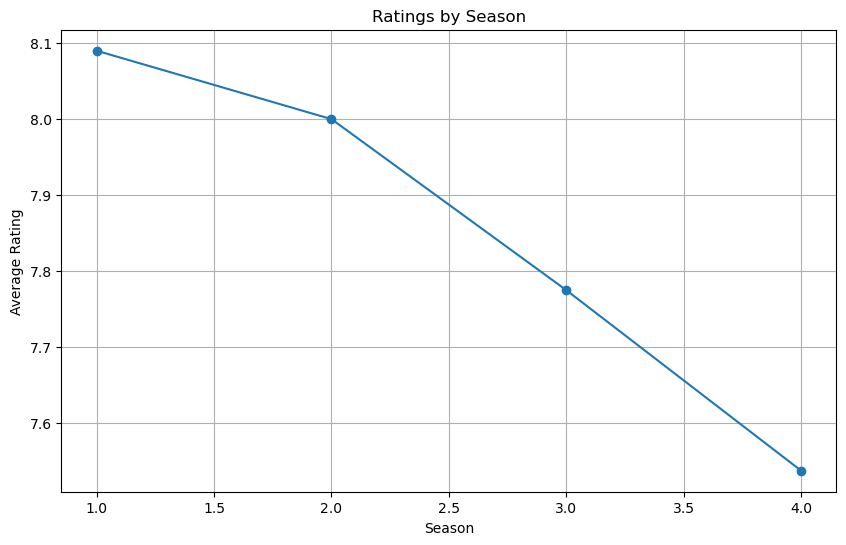

In [2]:
#Getting all the overall ratings for each season and using plots compare the ratings for all the seasons, like 
#season 1 ratings, season 2, and so on


import matplotlib.pyplot as plt

# grouping season and mean of average rating for that season together
ratings = df.groupby('season')['average rating'].mean().reset_index()

#plotting for visualisation of ratings
plt.figure(figsize=(10, 6))
plt.plot(ratings['season'], ratings['average rating'], marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Ratings by Season')
plt.grid(True)
plt.show()

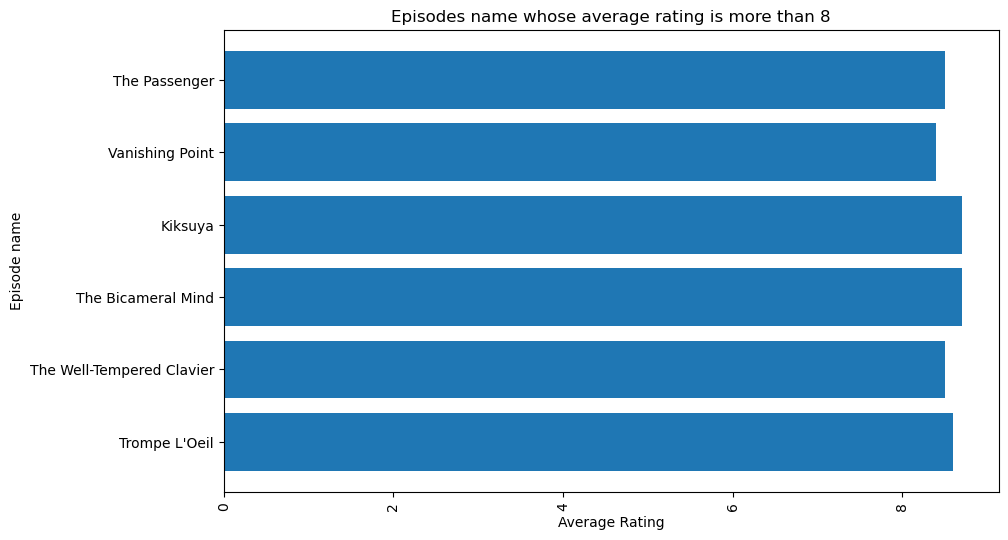

In [3]:
# Getting all the episode names, whose average rating is more than 8 for every season 

# filtering data in which rating is more than 8
Filter = df[df['average rating']>8]

#plotting for visualisation of episode names whose average rating is more than 8
plt.figure(figsize=(10, 6))
plt.barh(Filter['name'], Filter['average rating'])
plt.xlabel('Average Rating')
plt.ylabel('Episode name')
plt.title('Episodes name whose average rating is more than 8')
plt.xticks(rotation=90)
plt.show()

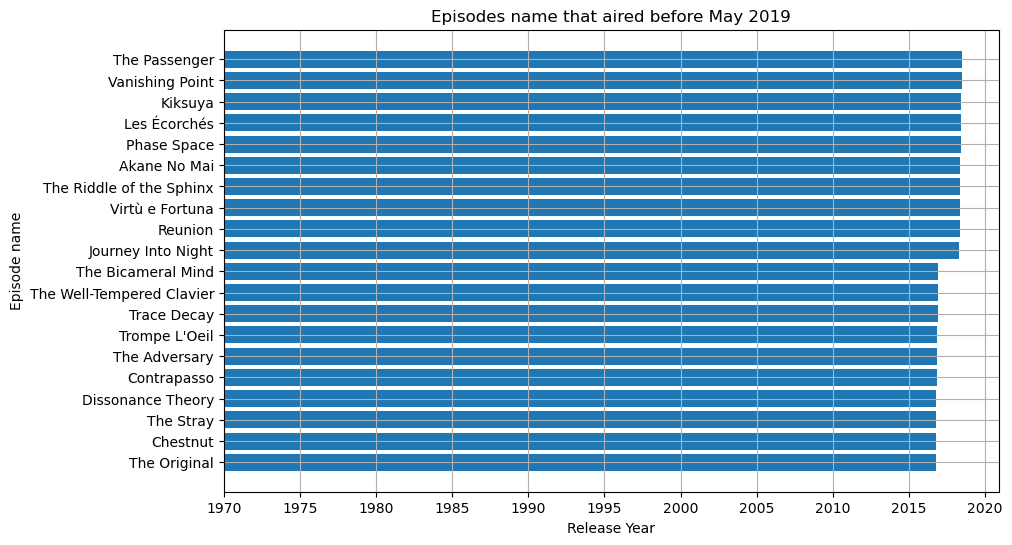

In [4]:
#Getting all the episode names that aired before May 2019

#filtering out the data in which date and year is below may 2019
Filter = df[df['airdate'] < pd.to_datetime('2019-05-01')]

#plotting for visualisation of episode names that aired before may 2019
plt.figure(figsize=(10, 6))
plt.barh(Filter['name'], Filter['airdate'])
plt.xlabel('Release Year')
plt.ylabel('Episode name')
plt.title('Episodes name that aired before May 2019')
plt.grid(True)
plt.show()

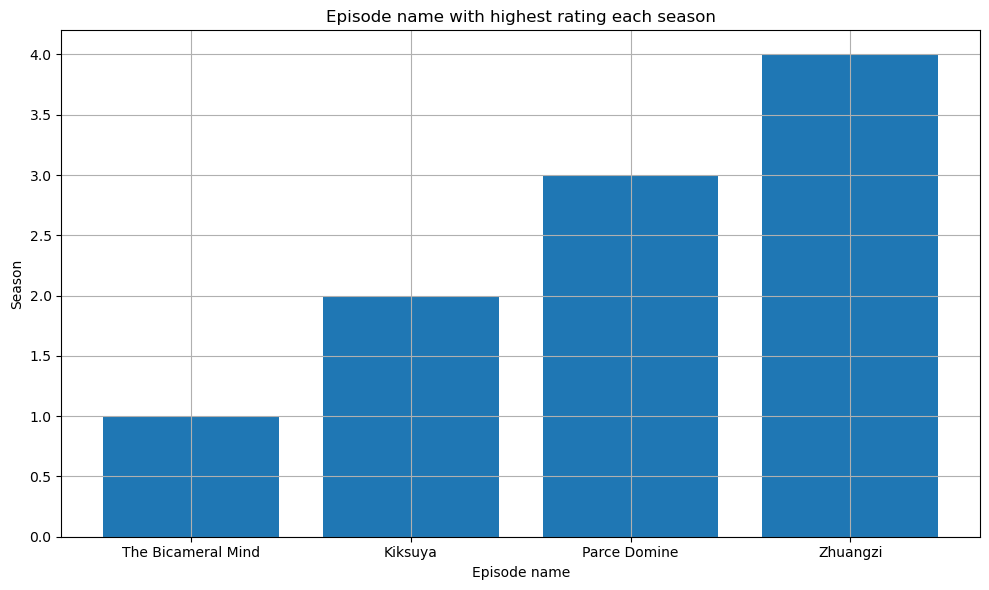

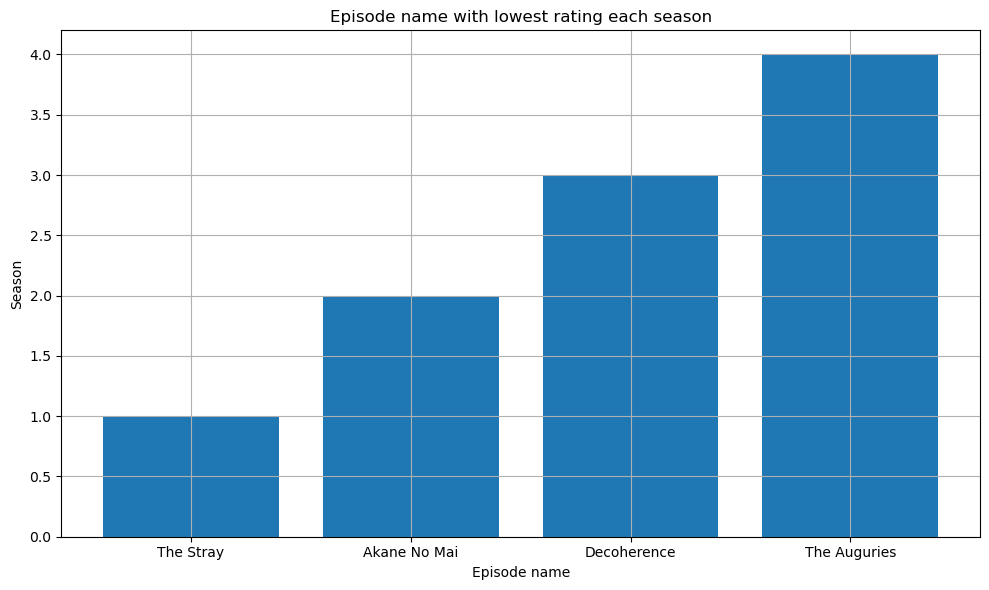

In [5]:
#Get the episode name from each season with the highest and lowest rating

#Filtering out the maximum rating by grouping it with season
max_Filter = df.groupby('season')['average rating'].idxmax()

#Filtering out the minimum rating by grouping it with season
min_Filter = df.groupby('season')['average rating'].idxmin()

# filtering out season and episode name according to maximum rating
max_names = df.loc[max_Filter, ['season', 'name']]

# filtering out season and episode name according to minimum rating
min_names = df.loc[min_Filter, ['season', 'name']]

#plotting for visualisation of episode names with the highest rating

plt.figure(figsize=(10, 6))  
plt.bar(max_names['name'], max_names['season'])
plt.xlabel('Episode name')
plt.ylabel('Season')
plt.title('Episode name with highest rating each season')
plt.tight_layout()
plt.grid(True)
plt.show()

#plotting for visualisation of episode names with the lowest rating

plt.figure(figsize=(10, 6)) 
plt.bar(min_names['name'], min_names['season'])
plt.xlabel('Episode name')
plt.ylabel('Season')
plt.title('Episode name with lowest rating each season')
plt.tight_layout()
plt.grid(True)
plt.show()

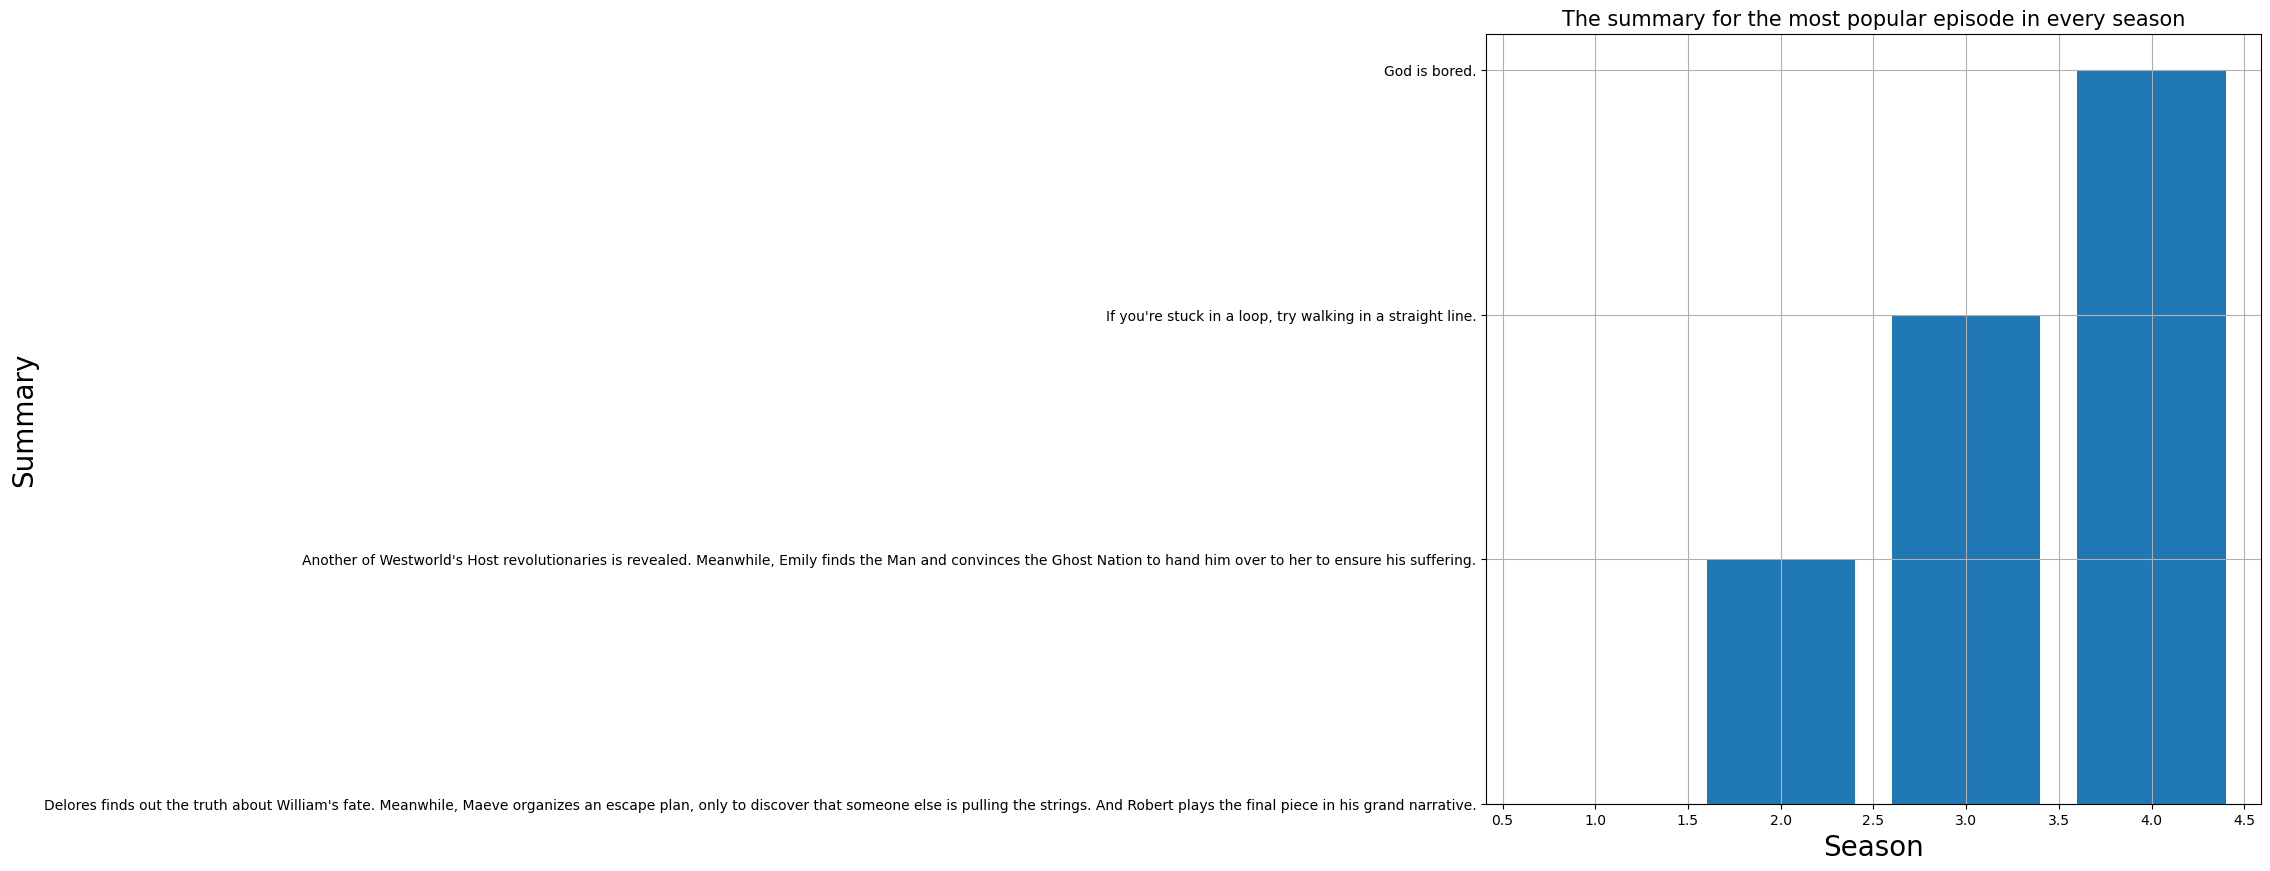

In [6]:
#Getting the summary for the most popular ( ratings ) episode in every season

#Filtering out the maximum rating by grouping it with season
max_Filter = df.groupby('season')['average rating'].idxmax()

# Filtering out season and summary according to maximum rating
popular_ep_summary = df.loc[max_Filter, ['season', 'summary']]


# plotting for visualisation of summary of the most popular episode each season
plt.figure(figsize=(10, 10)) 
plt.bar(popular_ep_summary['season'], popular_ep_summary['summary'])
plt.xlabel('Season', fontsize = 20)
plt.ylabel('Summary', fontsize = 20)
plt.title('The summary for the most popular episode in every season',fontsize = 15)
plt.grid(True)
plt.show()